In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
mall_df = pd.read_csv(r'C:\Users\taewoo\Desktop\Datasets\mall_customers.csv')
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preprocessing

In [4]:
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
for feature in mall_df.columns:
    print(f'unique values of {feature} column')
    print(mall_df[feature].unique())
    print('\n')

unique values of CustomerID column
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]


unique values of Gender column
['Male' 'Female']


unique values of Age column
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 4

There aren't any outliers or null values, so no more preprocessing is required after changing genders to numerical values

In [6]:
from sklearn import preprocessing

gender_label = mall_df[['Gender']].apply(preprocessing.LabelEncoder().fit_transform)
mall_df['Gender'] = gender_label['Gender']
mall_df.rename(columns={'Annual Income (k$)':'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace=True)

mall_df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### The Elbow Method

#### Cluster #1: Creating clusters using age and spending score

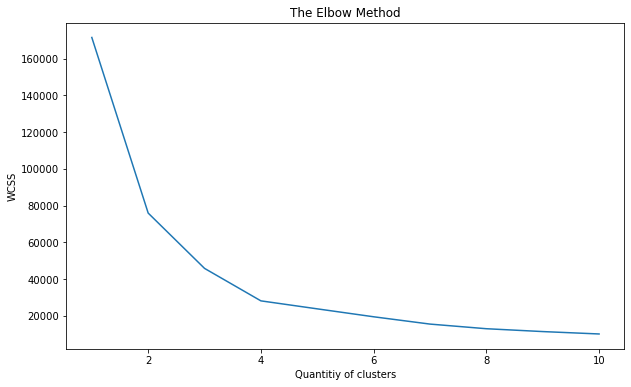

In [7]:
from sklearn.cluster import KMeans

X = mall_df[['Age', 'Spending Score']]

# use the elbow method to determine then optimal number of clusters
wcss = []  # within-cluster sum of square

for i in range(1, 11):
    clusters = KMeans(n_clusters=i)
    clusters.fit(X)
    wcss.append(clusters.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Quantitiy of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal number of cluster is 4

In [8]:
# build a k-means model
kmeans = KMeans(n_clusters=4)
y_prediction = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_ 

print(y_prediction)

[1 0 3 0 1 0 3 0 3 0 3 0 3 0 3 0 1 1 3 0 1 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3
 0 3 0 2 0 2 1 3 1 2 1 1 1 2 1 1 2 2 2 2 2 1 2 2 1 2 2 2 1 2 2 1 1 2 2 2 2
 2 1 2 1 1 2 2 1 2 2 1 2 2 1 1 2 2 1 2 1 1 1 2 1 2 1 1 2 2 1 2 1 2 2 2 2 2
 1 1 1 1 1 2 2 2 2 1 1 1 0 1 0 2 0 3 0 3 0 1 0 3 0 3 0 3 0 3 0 1 0 3 0 2 0
 3 0 3 0 3 0 3 0 3 0 3 0 2 0 3 0 3 0 3 0 3 1 3 0 3 0 3 0 3 0 3 0 3 0 3 0 1
 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0]


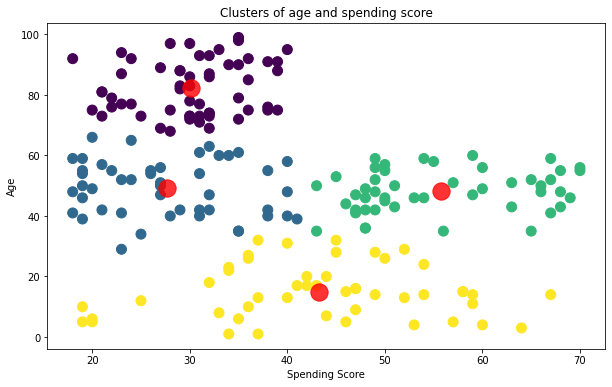

In [9]:
plt.figure(figsize=(10, 6))
plt.title('Clusters of age and spending score')
plt.scatter(x ='Age',
            y ='Spending Score',
            data = mall_df,
            c = y_prediction,
            s=100)
plt.scatter(x = centroids[: , 0],
            y =  centroids[: , 1],
            s = 300 , c = 'red',
            alpha = 0.8)
plt.ylabel('Age') , plt.xlabel('Spending Score')
plt.show()

#### Cluster #2: Creating clusters using age and annual income

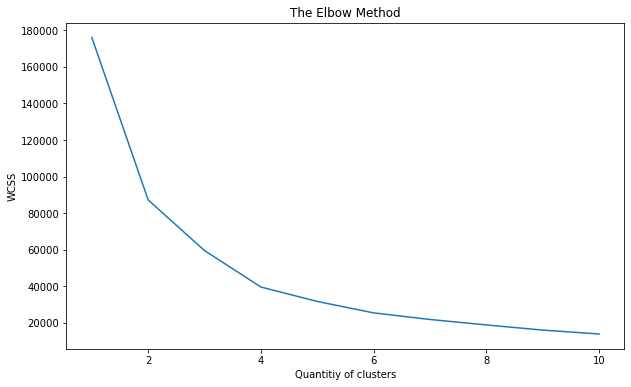

In [10]:
X = mall_df[['Age', 'Annual Income']]

wcss = []

for i in range(1, 11):
    clusters = KMeans(n_clusters=i)
    clusters.fit(X)
    wcss.append(clusters.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Quantitiy of clusters')
plt.ylabel('WCSS')
plt.show()

The optimal quantity is 4 again

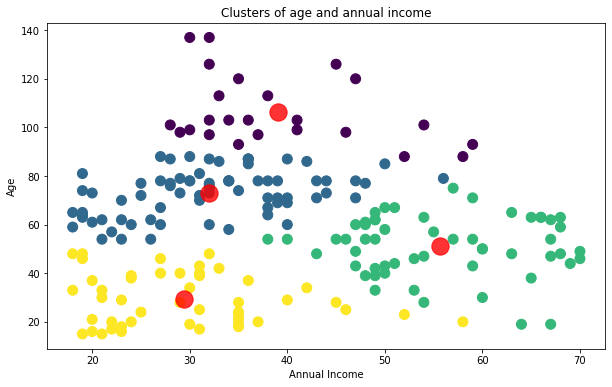

In [11]:
# build a k-means model
kmeans = KMeans(n_clusters=4)
y_prediction = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_ 

plt.figure(figsize=(10, 6))
plt.title('Clusters of age and annual income')
plt.scatter(x ='Age',
            y ='Annual Income',
            data = mall_df,
            c = y_prediction,
            s=100)
plt.scatter(x = centroids[: , 0],
            y =  centroids[: , 1],
            s = 300 , c = 'red',
            alpha = 0.8)
plt.ylabel('Age') , plt.xlabel('Annual Income')
plt.show()

#### Cluster #3 Creating clusters using annual income and spending score

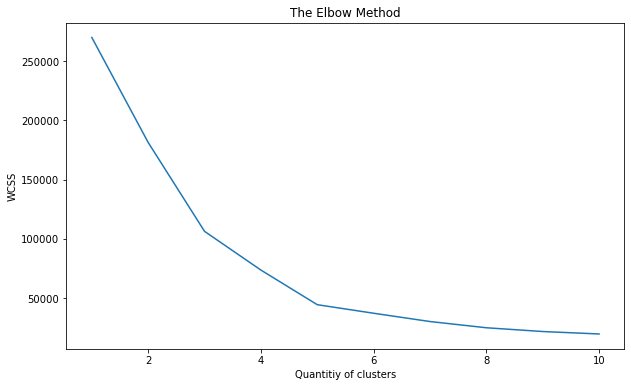

In [12]:
X = mall_df[['Spending Score', 'Annual Income']]

wcss = []

for i in range(1, 11):
    clusters = KMeans(n_clusters=i)
    clusters.fit(X)
    wcss.append(clusters.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Quantitiy of clusters')
plt.ylabel('WCSS')
plt.show()

5 is the optimal cluster amount

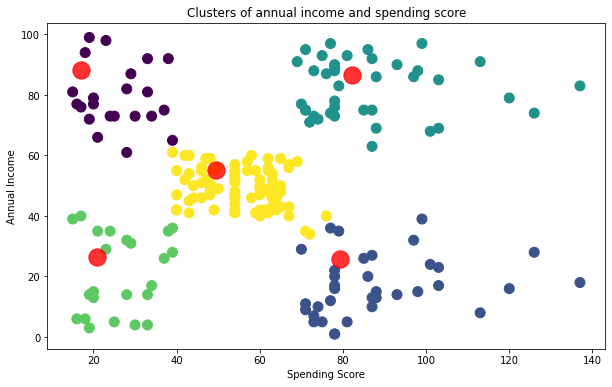

In [13]:
# build a k-means model
kmeans = KMeans(n_clusters=5)
y_prediction = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_ 

plt.figure(figsize=(10, 6))
plt.title('Clusters of annual income and spending score')
plt.scatter(x ='Annual Income',
            y ='Spending Score',
            data = mall_df,
            c = y_prediction,
            s=100)
plt.scatter(x = centroids[: , 0],
            y =  centroids[: , 1],
            s = 300 , c = 'red',
            alpha = 0.8)
plt.ylabel('Annual Income') , plt.xlabel('Spending Score')
plt.show()

#### Cluster #4 Creating clusters using age, annual income, and spending score

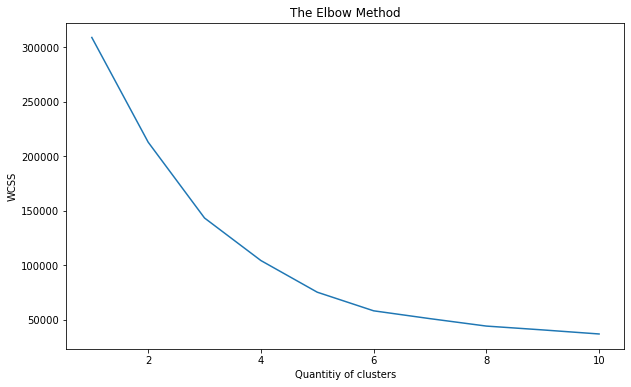

In [14]:
X = mall_df[['Age', 'Annual Income', 'Spending Score']]

wcss = []  # within-cluster sum of square

for i in range(1, 11):
    clusters = KMeans(n_clusters=i)
    clusters.fit(X)
    wcss.append(clusters.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Quantitiy of clusters')
plt.ylabel('WCSS')
plt.show()

6 seems to be the optimal choice here

In [15]:
# build a k-means model
kmeans = KMeans(n_clusters=6, random_state=3)
y_prediction = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_

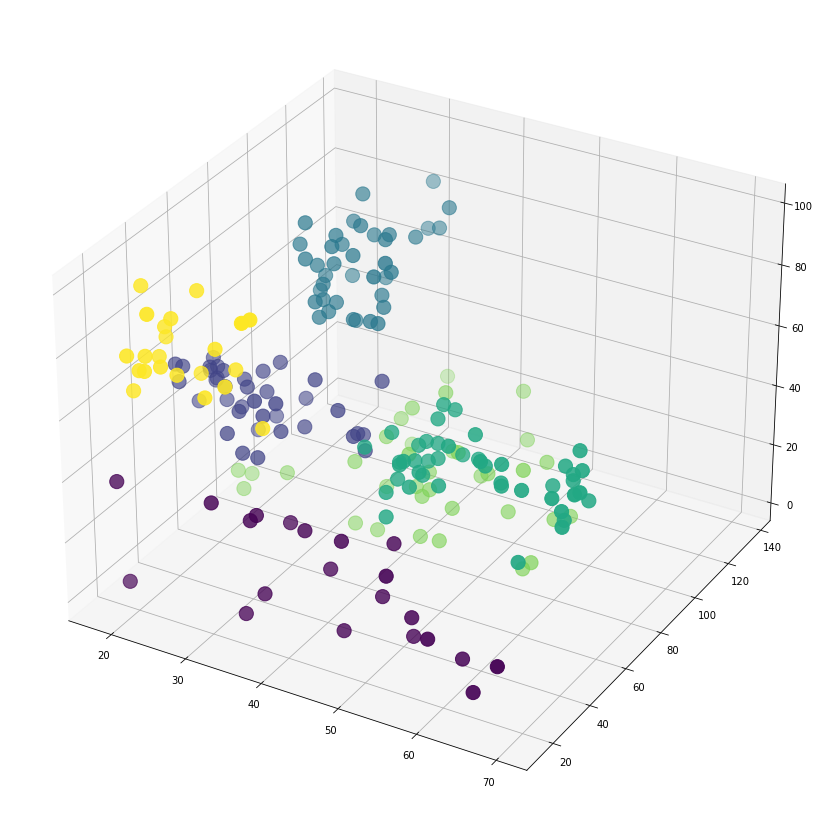

In [16]:
from mpl_toolkits import mplot3d

plt.figure(figsize=(15,15))
ax = plt.axes(projection ="3d")
ax.scatter3D(xs=mall_df['Age'], 
             ys=mall_df['Annual Income'], 
             zs=mall_df['Spending Score'], 
             c=y_prediction,
             s=200)
plt.show()

Depending on which features to use for clustering, the optimal number of cluster varied.

Clustering is an interesting as its algorithm is of unsupervised learning.

It was kind of convenient to code in a way since I didnt have to divide data for training and testing.

I've read the placements of centroids heavily affect how well clustering performs, so I'd like to know how optimizing hyperparameters work in the following clustering projects.